In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/titanic_dataset .csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.drop('PassengerId',axis=1,inplace=True)

In [7]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

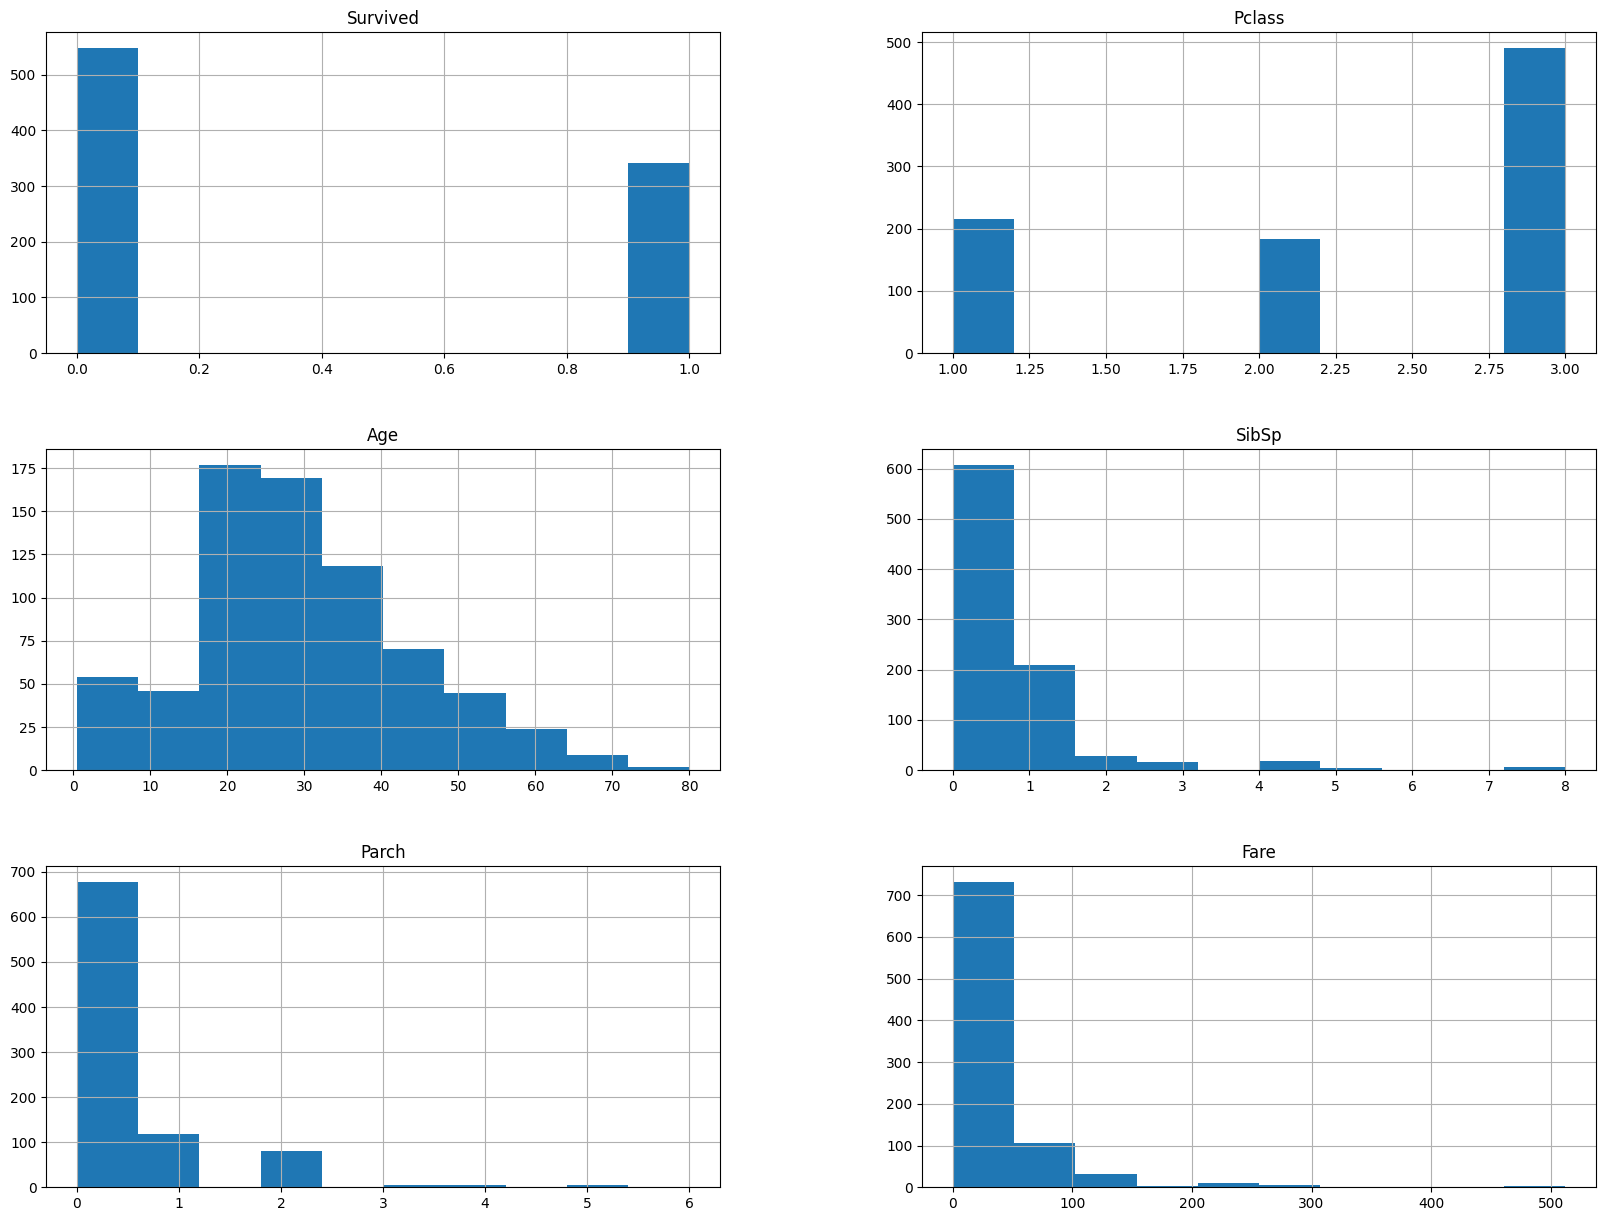

In [9]:
freqgraph = data.select_dtypes(include=['float64','int64','object'])
freqgraph.hist(figsize=(20,15))

In [10]:
data['Age']= data ['Age'].fillna(data['Age'].median())
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']= data ['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [12]:
# handling outliers

In [13]:
num_columns = data.select_dtypes(include=["int", "float"]).columns


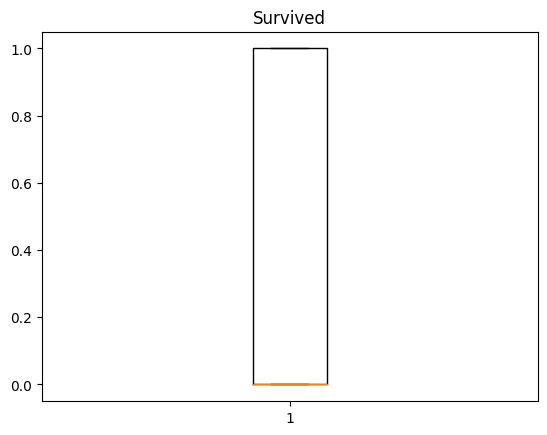

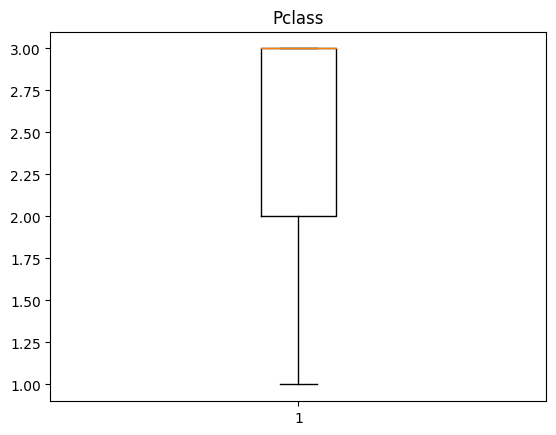

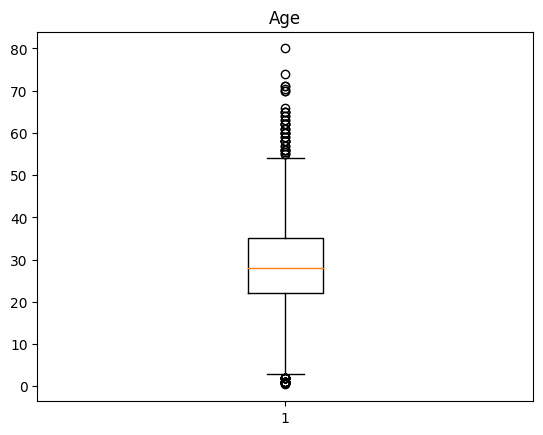

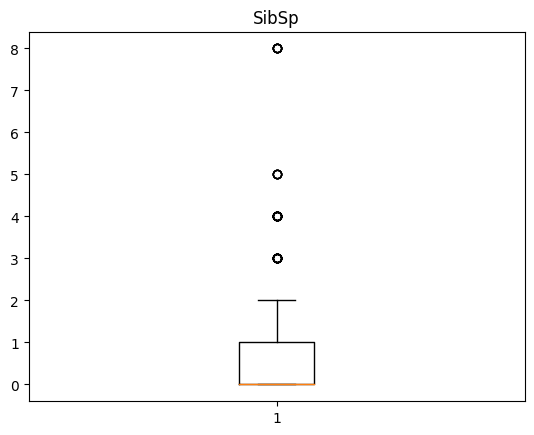

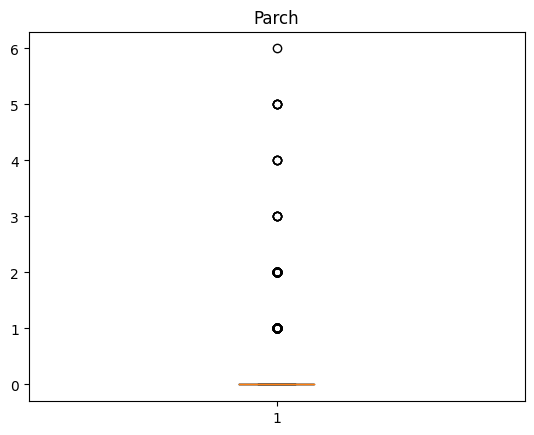

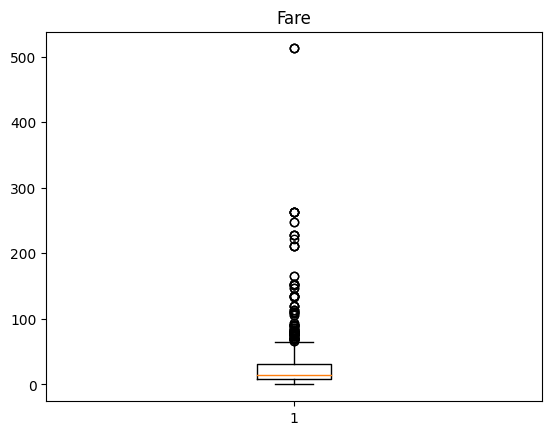

In [14]:
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [ ]:
#remove outliner

In [15]:
Q1=np.percentile(data['Fare'],25,method='midpoint')
Q2=np.percentile(data['Fare'],50,method='midpoint')
Q3=np.percentile(data['Fare'],75,method='midpoint')
print('Q1 is:', Q1)
print('Q2 is:', Q2)
print('Q3 is:', Q3)

Q1 is: 7.9104
Q2 is: 14.4542
Q3 is: 31.0


In [16]:
IQR =Q3-Q1
print(IQR)

23.0896


In [17]:
lower_lim=Q1-1.5*IQR
UP_lim=Q3+1.5*IQR

In [18]:
print('lower whisker is', lower_lim)
print('upper whisker is',UP_lim)

lower whisker is -26.724
upper whisker is 65.6344


In [19]:
outlier=[]
for X in data['Fare']:
  if((X< lower_lim)or(X> UP_lim)):
    outlier.append(X)
    print(outlier)

[71.2833]
[71.2833, 263.0]
[71.2833, 263.0, 146.5208]
[71.2833, 263.0, 146.5208, 82.1708]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6]
[71.2833, 263

In [20]:
data['Fare']=data['Fare'].clip(lower=lower_lim,upper=UP_lim)

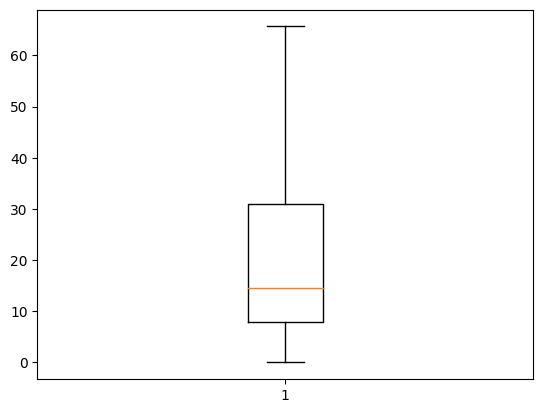

In [21]:
plt.boxplot(data['Fare'])
plt.show();

In [22]:
Q1=np.percentile(data['Parch'],25,method='midpoint')
Q2=np.percentile(data['Parch'],50,method='midpoint')
Q3=np.percentile(data['Parch'],75,method='midpoint')
print('Q1 is:', Q1)
print('Q2 is:', Q2)
print('Q3 is:', Q3)

Q1 is: 0.0
Q2 is: 0.0
Q3 is: 0.0


In [23]:
IQR =Q3-Q1
print(IQR)

0.0


In [24]:
lower_lim=Q1-1.5*IQR
UP_lim=Q3+1.5*IQR

In [25]:
lower_lim=Q1-1.5*IQR
UP_lim=Q3+1.5*IQR

In [26]:
print('lower whisker is', lower_lim)
print('upper whisker is',UP_lim)

lower whisker is 0.0
upper whisker is 0.0


In [45]:
outlier=[]
for X in data['Parch']:
  if((X< lower_lim)or(X> UP_lim)):
    outlier.append(X)
    print(outlier)

[1]
[1, 2]
[1, 2, 1]
[1, 2, 1, 5]
[1, 2, 1, 5, 1]
[1, 2, 1, 5, 1, 1]
[1, 2, 1, 5, 1, 1, 5]
[1, 2, 1, 5, 1, 1, 5, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1]
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1]


In [46]:
data['Parch']=data['Parch'].clip(lower=lower_lim,upper=UP_lim)

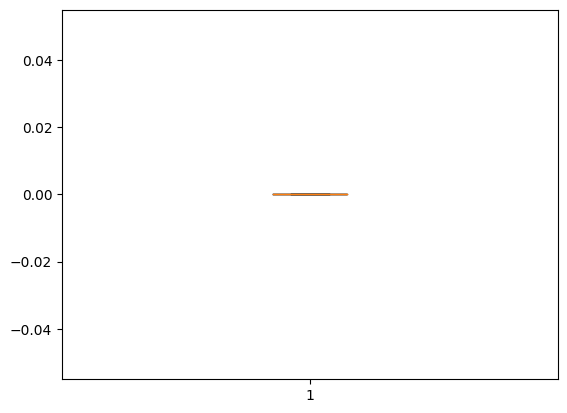

In [47]:
plt.boxplot(data['Parch'])
plt.show();

In [48]:
Q1=np.percentile(data['Age'],25,method='midpoint')
Q2=np.percentile(data['Age'],50,method='midpoint')
Q3=np.percentile(data['Age'],75,method='midpoint')
print('Q1 is:', Q1)
print('Q2 is:', Q2)
print('Q3 is:', Q3)

Q1 is: 22.0
Q2 is: 28.0
Q3 is: 35.0


In [49]:
IQR =Q3-Q1
print(IQR)

13.0


In [50]:
lower_lim=Q1-1.5*IQR
UP_lim=Q3+1.5*IQR

In [ ]:
lower_lim=Q1-1.5*IQR
UP_lim=Q3+1.5*IQR

In [ ]:
print('lower whisker is', lower_lim)
print('upper whisker is',UP_lim)

lower whisker is 2.5
upper whisker is 54.5


In [51]:
outlier=[]
for X in data['Age']:
  if((X< lower_lim)or(X> UP_lim)):
    outlier.append(X)
    print(outlier)

[2.0]
[2.0, 58.0]
[2.0, 58.0, 55.0]
[2.0, 58.0, 55.0, 2.0]
[2.0, 58.0, 55.0, 2.0, 66.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0]
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0]
[2.0, 58.

In [52]:
data['Age']=data['Age'].clip(lower=lower_lim,upper=UP_lim)

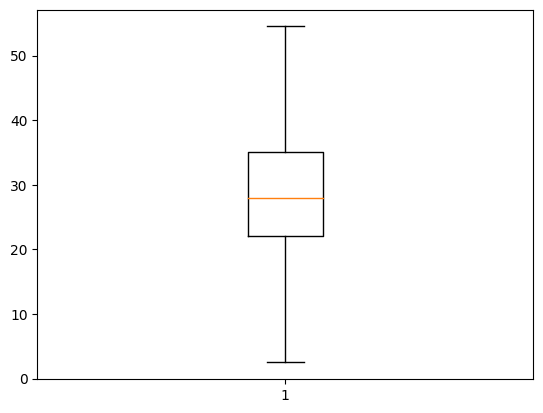

In [53]:
plt.boxplot(data['Age'])
plt.show();

In [54]:
Q1=np.percentile(data['SibSp'],25,method='midpoint')
Q2=np.percentile(data['SibSp'],50,method='midpoint')
Q3=np.percentile(data['SibSp'],75,method='midpoint')
print('Q1 is:', Q1)
print('Q2 is:', Q2)
print('Q3 is:', Q3)

Q1 is: 0.0
Q2 is: 0.0
Q3 is: 1.0


In [55]:
IQR =Q3-Q1
print(IQR)

1.0


In [56]:
lower_lim=Q1-1.5*IQR
UP_lim=Q3+1.5*IQR

In [57]:
print('lower whisker is', lower_lim)
print('upper whisker is',UP_lim)

lower whisker is -1.5
upper whisker is 2.5


In [58]:
outlier=[]
for X in data['SibSp']:
  if((X< lower_lim)or(X> UP_lim)):
    outlier.append(X)
    print(outlier)

[3]
[3, 4]
[3, 4, 3]
[3, 4, 3, 3]
[3, 4, 3, 3, 4]
[3, 4, 3, 3, 4, 5]
[3, 4, 3, 3, 4, 5, 3]
[3, 4, 3, 3, 4, 5, 3, 4]
[3, 4, 3, 3, 4, 5, 3, 4, 5]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4]
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8]


In [59]:
data['SibSp']=data['SibSp'].clip(lower=lower_lim,upper=UP_lim)

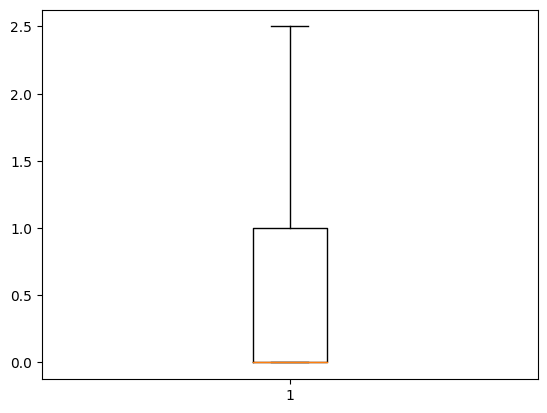

In [60]:
plt.boxplot(data['SibSp'])
plt.show();

In [61]:
from sklearn.preprocessing import StandardScaler

In [135]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,0.383838,2.308642,29.039282,0.426487,0.0,24.046813
std,0.486592,0.836071,12.072074,0.708246,0.0,20.481625
min,0.000000,1.000000,2.500000,0.000000,0.0,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.0,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.0,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.0,31.000000
max,1.000000,3.000000,54.500000,2.500000,0.0,65.634400


In [133]:
data1 = pd.get_dummies(data)

<ipython-input-134-8b064d90566e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix= data.corr()


<Axes: >

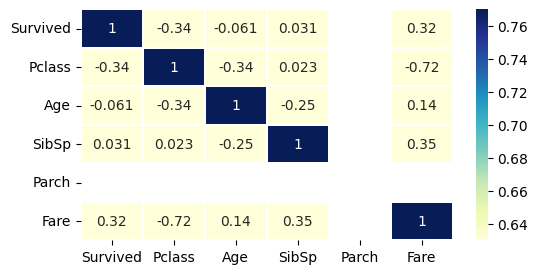

In [134]:
corrmatrix= data.corr()
plt.subplots(figsize=(6,3))
sns.heatmap(corrmatrix,vmin=0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')




In [65]:
data1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.060622,0.031434,NaN,0.317430,-0.026456,-0.026456,0.042470,-0.026456,...,-0.037436,0.033803,0.073642,-0.026456,0.060095,0.016040,-0.026456,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.340404,0.023180,NaN,-0.715300,0.027734,0.027734,0.027734,-0.012381,...,0.039243,-0.021469,-0.021469,0.027734,-0.017519,0.055561,-0.052496,-0.243292,0.221009,0.074053
Age,-0.060622,-0.340404,1.000000,-0.247806,NaN,0.144544,0.036008,-0.036226,0.016560,0.002669,...,-0.027673,-0.072451,-0.000189,-0.002887,-0.101383,-0.078836,0.044342,0.031011,-0.035100,-0.005078
SibSp,0.031434,0.023180,-0.247806,1.000000,NaN,0.349615,-0.020196,0.027159,0.027159,0.027159,...,-0.028578,0.019722,-0.035020,-0.020196,0.105437,0.006974,-0.020196,-0.026955,-0.032952,0.044351
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cabin_G6,0.016040,0.055561,-0.078836,0.006974,NaN,-0.034333,-0.002251,-0.002251,-0.002251,-0.002251,...,-0.003185,-0.003903,-0.003903,-0.002251,-0.003185,1.000000,-0.002251,-0.032371,-0.020654,0.041356
Cabin_T,-0.026456,-0.052496,0.044342,-0.020196,NaN,0.018755,-0.001124,-0.001124,-0.001124,-0.001124,...,-0.001590,-0.001948,-0.001948,-0.001124,-0.001590,-0.002251,1.000000,-0.016158,-0.010310,0.020643
Embarked_C,0.168240,-0.243292,0.031011,-0.026955,NaN,0.263603,-0.016158,-0.016158,-0.016158,0.069538,...,-0.022864,-0.028018,-0.028018,-0.016158,-0.022864,-0.032371,-0.016158,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.035100,-0.032952,NaN,-0.171339,-0.010310,-0.010310,-0.010310,-0.010310,...,-0.014588,-0.017877,-0.017877,0.108986,-0.014588,-0.020654,-0.010310,-0.148258,1.000000,-0.499421


In [31]:
y = data1['Survived']
x = data1.drop('Survived',axis=1)

In [66]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [67]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [68]:
x

,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,65.6344,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,3,28.0,1,2,23.4500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,26.0,0,0,30.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 3. Create kNN and SVM models

In [69]:
from sklearn.linear_model import LogisticRegression


In [70]:
log_reg=LogisticRegression()

In [71]:
log_reg.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
log_model=log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
score_log=log_model.score(x_test,y_test)

In [72]:
y_log_pred=log_reg.predict(x_test)


In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test,y_log_pred)

array([[115,  19],
       [ 21,  68]])

In [ ]:
###**KNN** MODEL

In [74]:
from  sklearn.neighbors import KNeighborsClassifier

metric_k = []

neighbors = np.arange(3, 15)

In [75]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

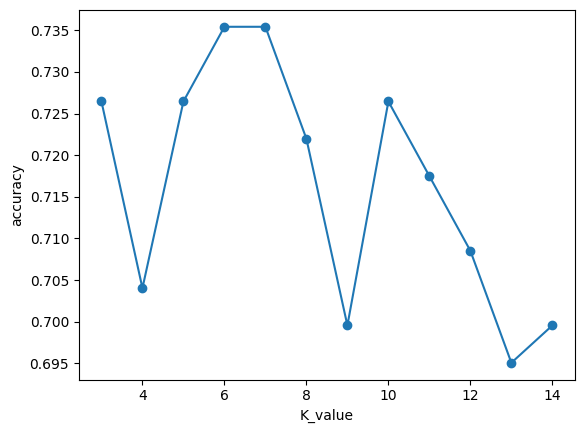

In [76]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [77]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_knn)
metric_k.append(accuracy)

In [78]:
confusion_matrix(y_test,y_log_pred)

array([[115,  19],
       [ 21,  68]])

In [79]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print(' Precision :',precision_score(y_test,y_log_pred,average='micro'))

print('Recall :',recall_score(y_test,y_log_pred, average='micro'))
print('F1 :',f1_score(y_test,y_log_pred, average='micro'))

Accuracy : 0.820627802690583
 Precision : 0.820627802690583
Recall : 0.820627802690583
F1 : 0.820627802690583


# SVM MODEL

In [80]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(x_train,y_train)

SVC(kernel='linear')

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy :',accuracy_score(y_test,y_log_pred))

Accuracy : 0.820627802690583


In [83]:
print(confusion_matrix(y_test,y_log_pred))

[[115  19]
 [ 21  68]]


In [85]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='sigmoid')
sv_cl.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy :',accuracy_score(y_test,y_log_pred))

Accuracy : 0.820627802690583


In [87]:
print(confusion_matrix(y_test,y_log_pred))

[[115  19]
 [ 21  68]]


In [89]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='rbf')
sv_cl.fit(x_train,y_train)

SVC()

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy :',accuracy_score(y_test,y_log_pred))

Accuracy : 0.820627802690583


In [91]:
print(confusion_matrix(y_test,y_log_pred))

[[115  19]
 [ 21  68]]


# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [106]:
# KFOLD


In [107]:
from sklearn.model_selection import KFold


In [108]:
KFold_validation=KFold(10)


In [109]:
from sklearn.model_selection import KFold


In [110]:

for train_index, test_index in KFold_validation.split(x, y):
    print('train_index:', train_index)
    print('test_index:', test_index)

train_index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 3

In [111]:
from sklearn.model_selection import cross_val_score

In [116]:
cv_score=cross_val_score(log_model,x,y,cv=KFold_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [117]:
score_log

0.820627802690583

In [119]:
cv_score

array([0.81111111, 0.83146067, 0.79775281, 0.79775281, 0.82022472,
       0.7752809 , 0.76404494, 0.7752809 , 0.84269663, 0.82022472])

In [120]:
cv_score.mean()

0.8035830212234707

In [ ]:
# stratified cv

In [121]:
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)

In [122]:
cv_score_sr=cross_val_score(log_model,x,y,cv=stratified_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [123]:

for train_index, test_index in stratified_cv.split(x, y):
    print('train_index:', train_index)
    print('test_index:', test_index)

train_index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 3

In [124]:
cv_score_sr

array([0.83333333, 0.82022472, 0.7752809 , 0.83146067, 0.83146067,
       0.7752809 , 0.79775281, 0.82022472, 0.83146067, 0.82022472])

In [125]:
cv_score_sr.mean()

0.8136704119850189

average accuracy score of the model is StratifiedKFold